# `Competition`

#### Last name, first name:

**Issue date:** <span style="color:red">__December 2__</span>.

**Deadline:** <span style="color:red">__December 19, 23:59__</span>.

**Cost:** 10 points

**Format:** provide the caching steps for verification and full report.

<span style="color:red">__In a laptop, all cells should execute without errors when they are executed sequentially.__</span>

## Base imports

In [1]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00


In [2]:
!pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.9
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.11.24.0.39.11
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.6
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.29.1
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.11.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.2
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex=

In [3]:
!wget https://raw.githubusercontent.com/thecrazymage/DL2_HSE/main/homeworks/competition/prompt2noise.pt
!wget https://raw.githubusercontent.com/thecrazymage/DL2_HSE/main/homeworks/competition/prompts.txt

--2025-12-02 13:10:28--  https://raw.githubusercontent.com/thecrazymage/DL2_HSE/main/homeworks/competition/prompt2noise.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3313161 (3.2M) [application/octet-stream]
Saving to: ‘prompt2noise.pt’

prompt2noise.pt     100%[===================>]   3.16M  --.-KB/s    in 0.04s   

2025-12-02 13:10:29 (80.3 MB/s) - ‘prompt2noise.pt’ saved [3313161/3313161]

--2025-12-02 13:10:29--  https://raw.githubusercontent.com/thecrazymage/DL2_HSE/main/homeworks/competition/prompts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [4]:
import time
import lpips
import torch
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [5]:
with open("prompts.txt", "r", encoding="utf-8") as f:
    prompts = [line.strip() for line in f if line.strip()]

prompt2noise = torch.load('prompt2noise.pt')

assert len(prompts) == len(prompt2noise), "Downloaded data was corrupted!"

## Diffusion model

Initialize the Stable Diffusion 2.1 pipeline and check the generation operation on a test prompt. We compare the result with the reference image to make sure that the environment is reproducible.

In [6]:
model_id = "sd2-community/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to(device)


pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [7]:
PROMPT = "A narrow city street with pedestrians and cars looking towards a domed building."
STEPS = 25

  0%|          | 0/25 [00:00<?, ?it/s]

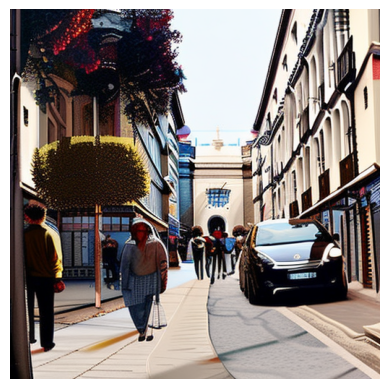

In [8]:
baseline_image = pipe(
    prompt=PROMPT,
    num_inference_steps=STEPS,
    latents=prompt2noise[PROMPT]
).images[0]

plt.imshow(baseline_image)
plt.axis('off')
plt.show()

## Cacher

The `CachingHelper` class accelerates Stable Diffusion inference by caching intermediate feature maps at the block level, not by skipping entire U-Net forward passes.

**How it works:**
1. **Timestep tracking**: Wraps the top-level U-Net to detect which denoising step we're at and sets a `recalculate` flag.
2. **Block-level caching**: Intercepts individual ResNet, Attention, and sampler blocks:
   - On computed steps: runs normally and stores outputs in cache.
   - On skipped steps: returns cached outputs instead of recomputing.
3. **Quality preservation**: Final upsampling blocks are never cached to maintain output fidelity.

**Result**: By reusing stable features from previous timesteps, this achieves great speedup with minimal perceptual loss when the caching strategy is well-chosen.


It was adapted from: https://github.com/horseee/DeepCache

In [9]:
import torch
from contextlib import contextmanager
from typing import List, Union

class CachingHelper:
    def __init__(self, pipe):
        self.pipe = pipe

        self.function_dict = dict()
        self.cached_output = dict()
        self.ts_to_skip = []

        self.wrap_model()

    def wrap_unet(self):
        self.function_dict['unet_forward'] = self.pipe.unet.forward

        def wrapped_forward(*args, **kwargs):
            self.timestep = list(self.pipe.scheduler.timesteps).index(args[1].item())
            self.recalculate = self.timestep not in self.ts_to_skip
            output = self.function_dict['unet_forward'](*args, **kwargs)
            return output

        self.pipe.unet.forward = wrapped_forward

    def wrap_blocks(self, block, block_name, block_i, layer_i, blocktype = "down"):
        self.function_dict[
            (blocktype, block_name, block_i, layer_i)
        ] = block.forward

        def wrapped_forward(*args, **kwargs):
            if (blocktype, block_name, block_i, layer_i) in [('up', 'resnet', 0, 0), ('up', 'block', 0, 0)]:
                return self.function_dict[(blocktype, block_name,  block_i, layer_i)](*args, **kwargs)

            if self.recalculate:
                self.cached_output[
                    (blocktype, block_name, block_i, layer_i)
                ] = self.function_dict[
                    (blocktype, block_name,  block_i, layer_i)
                ](*args, **kwargs)

            return self.cached_output[(blocktype, block_name, block_i, layer_i)]

        block.forward = wrapped_forward

    def wrap_model(self):
        # 1. wrap unet
        self.wrap_unet()

        # 2. wrap downblock forward
        for block_i, block in enumerate(self.pipe.unet.down_blocks):
            for (layer_i, attention) in enumerate(getattr(block, "attentions", [])):
                self.wrap_blocks(attention, "attentions", block_i, layer_i)
            for (layer_i, resnet) in enumerate(getattr(block, "resnets", [])):
                self.wrap_blocks(resnet, "resnet", block_i, layer_i)
            for downsampler in getattr(block, "downsamplers", []) if block.downsamplers else []:
                self.wrap_blocks(downsampler, "downsampler", block_i, len(getattr(block, "resnets", [])))
            self.wrap_blocks(block, "block", block_i, 0, blocktype = "down")

        # 3. wrap midblock forward
        self.wrap_blocks(self.pipe.unet.mid_block, "mid_block", 0, 0, blocktype = "mid")

        # 4. wrap upblock forward
        block_num = len(self.pipe.unet.up_blocks)
        for block_i, block in enumerate(self.pipe.unet.up_blocks):
            layer_num = len(getattr(block, "resnets", []))
            for (layer_i, attention) in enumerate(getattr(block, "attentions", [])):
                self.wrap_blocks(attention, "attentions", block_num - block_i - 1, layer_num - layer_i - 1, blocktype = "up")
            for (layer_i, resnet) in enumerate(getattr(block, "resnets", [])):
                self.wrap_blocks(resnet, "resnet", block_num - block_i - 1, layer_num - layer_i - 1, blocktype = "up")
            for upsampler in getattr(block, "upsamplers", []) if block.upsamplers else []:
                self.wrap_blocks(upsampler, "upsampler", block_num - block_i - 1, 0, blocktype = "up")
            self.wrap_blocks(block, "block", block_num - block_i - 1, 0, blocktype = "up")

    @contextmanager
    def inference(self, ts_to_skip: Union[List, torch.Tensor]):
        self.ts_to_skip = ts_to_skip
        yield

        self.recalculate = True
        self.cached_output = dict()
        self.ts_to_skip = []

  0%|          | 0/25 [00:00<?, ?it/s]

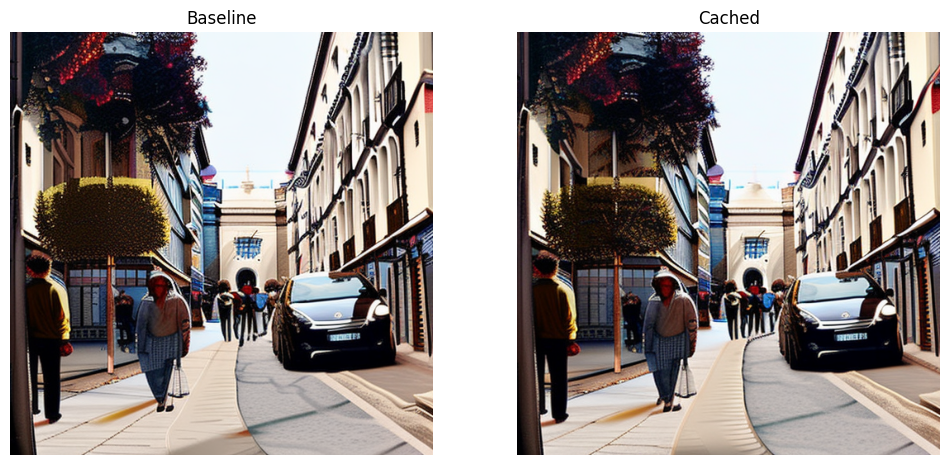

In [10]:
helper = CachingHelper(pipe)
skip_indices = [8, 15, 19, 21, 22]

with helper.inference(ts_to_skip=skip_indices):
    image_cached = pipe(PROMPT, num_inference_steps=STEPS, latents=prompt2noise[PROMPT]).images[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(baseline_image)
axs[0].axis('off')
axs[0].set_title('Baseline')

axs[1].imshow(image_cached)
axs[1].axis('off')
axs[1].set_title('Cached')

plt.show()

In [11]:
print("Measuring Baseline...")
if torch.cuda.is_available(): torch.cuda.synchronize()
start_base = time.perf_counter()

baseline_image = pipe(PROMPT, num_inference_steps=STEPS, latents=prompt2noise[PROMPT]).images[0]

if torch.cuda.is_available(): torch.cuda.synchronize()
baseline_time = time.perf_counter() - start_base
print(f"Baseline time: {baseline_time:.4f} sec")

print("Measuring Cached version...")
helper = CachingHelper(pipe)
skip_indices = [8, 15, 19, 21, 22]

if torch.cuda.is_available(): torch.cuda.synchronize()
start_cached = time.perf_counter()

with helper.inference(ts_to_skip=skip_indices):
    image_cached = pipe(PROMPT, num_inference_steps=STEPS, latents=prompt2noise[PROMPT]).images[0]

if torch.cuda.is_available(): torch.cuda.synchronize()
cached_time = time.perf_counter() - start_cached
print(f"Cached time: {cached_time:.4f} sec")


speedup = (baseline_time - cached_time) / baseline_time * 100
print(f"Speedup: {speedup:.2f}%")
assert cached_time < baseline_time, f"Your caching works slower?? ({cached_time:.2f} vs {baseline_time:.2f})"
assert speedup > 5.0, f"Too slow: speedup=({speedup:.2f}%)"
print("Time check passed!")

Measuring Baseline...


  0%|          | 0/25 [00:00<?, ?it/s]

Baseline time: 3.2929 sec
Measuring Cached version...


  0%|          | 0/25 [00:00<?, ?it/s]

Cached time: 2.7097 sec
Speedup: 17.71%
Time check passed!


In [12]:
img_cached_arr = np.array(image_cached).astype(np.float32)
img_base_arr = np.array(baseline_image).astype(np.float32)
mse = np.mean((img_cached_arr - img_base_arr) ** 2)

assert mse > 0.01, "You generated identical images!"
assert mse < 500, f"MSE={mse} is too big!"
print("Similarity check passed!")

Similarity check passed!


## Metric

You are going to implement LPIPS. It evaluates the perceptual similarity between the generated images and the baseline images.

It was adapted from: https://github.com/richzhang/PerceptualSimilarity

In [13]:
class LPIPSMetric():
    """
        LPIPS Metric
    """

    def __init__(
        self,
        net='vgg',
        device='cuda:0'
    ):
        self.device = device
        self.model = lpips.LPIPS(net=net, spatial=False).to(device).eval()
        for param in self.model.parameters():
            param.requires_grad = False

    def _apply_reduction(self, scores, reduction="mean"):
        if reduction == 'sum':
            return scores.sum()
        elif reduction == 'none':
            return scores
        else:
            return scores.mean()

    @torch.inference_mode()
    def forward(self, generated_images, teacher_images, **kwargs):
        """
            Images in [0, 1], converted to [-1, 1] internally.
        """

        # [0, 1] -> [-1, 1]
        gen = (generated_images.to(self.device).clamp(0, 1) * 2.0) - 1.0
        ref = (teacher_images.to(self.device).clamp(0, 1) * 2.0)   - 1.0

        scores = self.model(ref, gen).squeeze()
        if scores.dim() == 0:
            scores = scores.unsqueeze(0)

        return self._apply_reduction(scores, reduction=kwargs.get('reduction', 'mean'))

In [14]:
metric = LPIPSMetric(device=device)

img_base = torch.rand(4, 3, 64, 64)
img_similar = (img_base + 0.05 * torch.randn_like(img_base)).clamp(0, 1)
img_diff = torch.rand(4, 3, 64, 64)

score_identity = metric.forward(img_base, img_base).item()
assert np.isclose(score_identity, 0.0, atol=1e-5), f"Identity Failed: Distance to self is {score_identity}, expected 0.0!"

score_sim = metric.forward(img_base, img_similar).item()
score_diff = metric.forward(img_base, img_diff).item()
assert score_sim < score_diff, "Semantic Fail: LPIPS thinks a random image is closer than a noisy version!"

batch_scores = metric.forward(img_base, img_diff, reduction='none')
mean_score = metric.forward(img_base, img_diff, reduction='mean')
assert torch.isclose(batch_scores.mean(), mean_score, atol=1e-5), "Reduction Fail: 'mean' reduction does not equal manual averaging."

print("LPIPS checks passed!")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:05<00:00, 94.3MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth
LPIPS checks passed!


## Free research

**Task:** Optimal Caching Strategy Search

---
**Context**

We have seen the `CachingHelper` and `LPIPSMetric`. Now it is time to put them to work.

In diffusion models, not all denoising steps are equally important. Some steps (especially early ones) define the global structure of the image, while others (usually later ones) refine fine details. Step caching allows us to skip the heavy U-Net computation for certain timesteps by reusing the output from a previous step or a cached representation, significantly speeding up inference.

However, skipping too many steps or the wrong steps will degrade image quality. Your goal is to find the optimal subset of these steps.

---
**The Challenge**

We have a fixed budget for inference. The standard pipeline runs for 25 steps. You must skip exactly *16 steps*, meaning you can only *perform U-Net computation on 9 steps*.

Your task is to find the optimal list of indices to cache that minimizes the perceptual loss (LPIPS) compared to the full 25-step generation.

---
**Requirements**

1. *Constraints:* You must provide a list of exactly 9 indices to cache (integers from 0 to 24).

2. *Objective:* Minimize the LPIPS score (distance between the image obtained by your caching  and the original baseline image).

3. *Evaluation:* Your strategy will be tested on 25 prompts which you can find in file `prompts.txt`. The final score is the average LPIPS across these prompts.

4. *Report:* After your work, we expect a full and detailed report from you, which will describe your actions, thoughts and ideas on the work done.

---
**Tips for Success**

1. Try to find papers, articles or blog posts about caching strategies. You can use any LLMs and deep searches for it. But don't forget to write about it in your report.

2. Structure vs. Texture: Recall that diffusion models build structure (shapes, composition) in the early steps and texture (details, noise) in the later steps. Where can you afford to "cheat" by reusing features?

3. Grid Search: If you are stuck, try writing a simple loop to test standard patterns (e.g., skipping every 2nd step, skipping blocks of steps).

4. We always need to calculate step 0, so now you need to find the next 8 steps =)

---
**Assessment scale**

1. LPIPS <  0.65 => `1 point`
2. LPIPS <  0.55 => `2 point`
3. LPIPS <  0.52 => `4 point`
4. LPIPS <  0.50 => `6 point`
5. LPIPS <  0.44 => `8 point`
6. Next, I will compare all the submitted works (we are going to have one 9 and 10 marks).

In [17]:
STEPS_TO_COMPUTE = [0, 17, 18, 19, 20, 21, 22, 23, 24]


ALL_STEPS = set(range(STEPS))
BEST_SKIP_INDICES = list(ALL_STEPS - set(STEPS_TO_COMPUTE))

pipe.set_progress_bar_config(disable=True)

In [18]:
lpips_scores = []

for i, prompt in enumerate(tqdm(prompts, desc="Generating images")):

    with torch.inference_mode():
        image_base = pipe(prompt, num_inference_steps=STEPS, latents=prompt2noise[prompt]).images[0]
        with helper.inference(ts_to_skip=BEST_SKIP_INDICES):
            image_cached = pipe(prompt, num_inference_steps=STEPS, latents=prompt2noise[prompt]).images[0]

    base_image = torch.from_numpy(np.array(image_base)).permute(2, 0, 1).float() / 255.0
    cached_image = torch.from_numpy(np.array(image_cached)).permute(2, 0, 1).float() / 255.0

    with torch.inference_mode():
        current_score = metric.forward(cached_image, base_image).item()
    lpips_scores.append(current_score)

avg_score = np.mean(lpips_scores)
print(f"\n\nAverage LPIPS: {avg_score:.4f}")

Generating images: 100%|██████████| 100/100 [08:28<00:00,  5.08s/it]



Average LPIPS: 0.7205


### Report

**STEPS_TO_COMPUTE** = ??? (**LPIPS** = ???)

**Text:**

???